In [14]:
from numpy import empty, zeros, max
from pylab import imshow, gray, show

In [52]:
M = 100
V = 10
target = 1e-2

phi = zeros([M+1, M+1], float)
phi[0,:] = V
phiprime = empty([M+1, M+1], float)

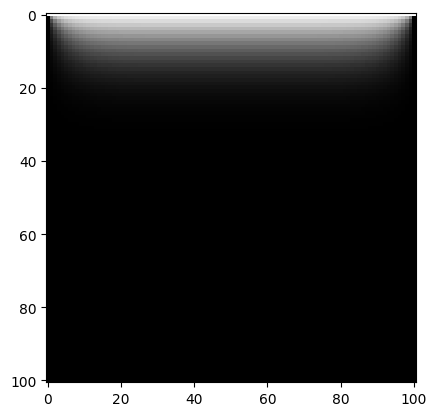

In [54]:
delta = 1.0
while delta > target:
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i, j] = phi[i, j]
            else:
                phiprime[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])/4
    delta = max(abs(phi-phiprime))
    phi, phiprime = phiprime, phi

imshow(phi)
gray()
show()

In [18]:
max(abs(phi))

1.0

### Problem 1 - relaxation mathod using Poisson equation

In [84]:
M = 100
V = 1
a, e0 = 1, 1
target = 1e-3

p_dens = zeros([M+1, M+1], float)
p_dens[20:40,60:80], phi[60:80, 20:40] = 1, -1

phi = zeros([M+1, M+1], float)
phi[20:40,60:80], phi[60:80, 20:40] = V, -V
phiprime = empty([M+1, M+1], float)

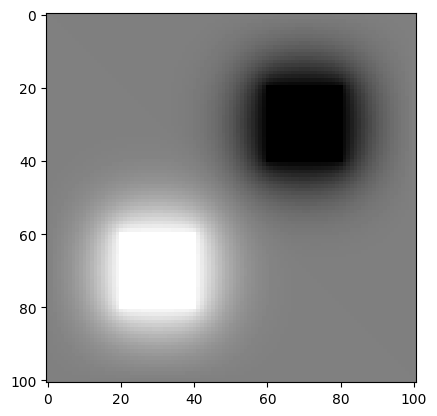

In [86]:
delta = 1.0

while delta > target:
    for i in range(M):
        for j in range(M):
            if ((i>=60 and i<=80) and (j>=20 and j<=40)):
                phiprime[i, j] = V
            elif ((i>=20 and i<=40) and (j>=60 and j<=80)):
                phiprime[i, j] = -V
            else:
                phiprime[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])/4 + p_dens[i, j]*(a**2)/(4*e0)
                
    delta = max(abs(phi-phiprime))
    phi, phiprime = phiprime, phi

imshow(phi)
gray()
show()

### Problem 2 - Use the Gauus-Seidel method to solve the Laplace equation